# Resumo

O trabalho presente visa realizar análises sucintas sobre os dados disponíveis de COVID no Brasil. Realizando comparações entre os intervalos de tempo, regiões, o status do Brasil ao longo da Pandemia.
Dessa forma, este material está sendo produzido embasado em diversas análises visuais de forma a tornar lúdico o conteúdo extraido desta base de dados complexa.

# Análises de dados

## BIBLIOTECAS

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import plotly
import geopandas as gpd

## IMPORT DE BASES DE DADOS 

#### Base de dados do Github Alura

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/caso.csv'  ,delimiter = ',', encoding = 'iso-8859-1')

#### Base de dados Brasil.IO retirado dia 22/11/2020

In [ ]:
data_new = pd.read_csv('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/caso_atualizado_22_11.csv'  ,delimiter = ',', encoding = 'iso-8859-1')

#### Dados de informação para plot pelo GeoPandas - retirado dia 22/11/2020 
#### Ref:http://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/

In [ ]:
INFOS_UFS = gpd.read_file('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



## Manipulações primárias

  

  ### - Transformar o campo data em tipo Date


In [ ]:
data['Data'] = pd.to_datetime(data['date'], format="%Y/%m/%d")
data['anomes'] = data['Data'].dt.strftime('%Y%m')

In [ ]:
data_new['Data'] = pd.to_datetime(data_new['date'], format="%Y/%m/%d")
data_new['anomes'] = data_new['Data'].dt.strftime('%Y%m')

### - Adicionando um campo de região

In [ ]:
def UF_X_Regiao(df):
  d = {'RO': 'Norte','AC': 'Norte','AM': 'Norte','RR': 'Norte','PA': 'Norte'
    ,'AP': 'Norte','TO': 'Norte','MA': 'Nordeste','PI': 'Nordeste','CE': 'Nordeste'
    ,'RN': 'Nordeste','PA': 'Nordeste','PE': 'Nordeste','AL': 'Nordeste','SE': 'Nordeste'
    ,'BA': 'Nordeste','MG': 'Sudeste','ES': 'Sudeste','RJ': 'Sudeste','SP': 'Sudeste'
    ,'PA': 'Sul','SC': 'Sul','RS': 'Sul','MS': 'Centro-Oeste','MT': 'Centro-Oeste'
    ,'GO': 'Centro-Oeste','DF': 'Centro-Oeste'}
  df['Regiao'] = df['state'].map(d)
  return(df)

In [ ]:
data = UF_X_Regiao(data)
DF_Estados = data[data['place_type']=='state']  

In [ ]:
data_new = UF_X_Regiao(data_new)
DF_Estados_new =   data_new[data_new['place_type']=='state']

### Desenvolvimento de alguns gráficos pelo método Pivot_Table - Função abaixo



Os gráfico abaixo servem apenas como pré visualização de como a informação pode ser melhor demonstrada

In [ ]:
def Plot_Pivot(df,Pivot_index, Pivot_Column, Pivot_Value ,figSZ,Plot_YLabel,title   ):
  pivot_df =  df.pivot_table(index=Pivot_index, columns=Pivot_Column, values=Pivot_Value)
  ax = pivot_df.plot(xticks=pivot_df.index,figsize =figSZ)
  ylab = ax.set_ylabel(Plot_YLabel)
  xlab = ax.set_xlabel(Pivot_index)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.title(title)
  plt.show()

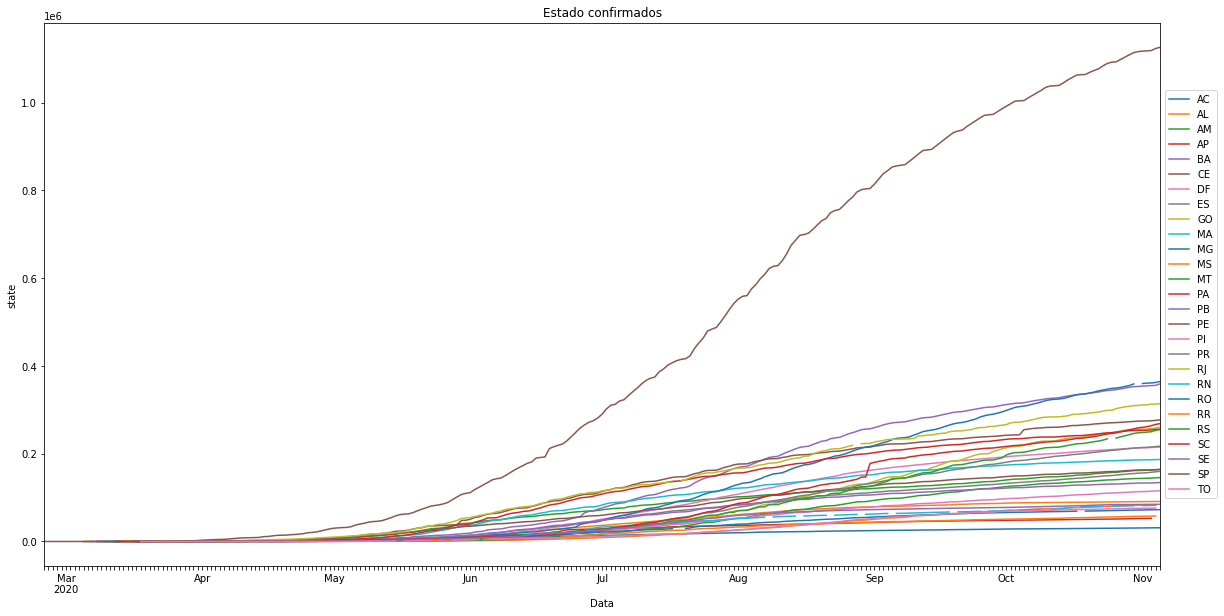

In [ ]:
Plot_Pivot(DF_State,'Data', 'state', 'confirmed',(20, 10),'state',"Estado confirmados")

In [ ]:
pivot_teste =  data.pivot_table(index='Data', columns='Regiao', values='confirmed_per_100k_inhabitants')


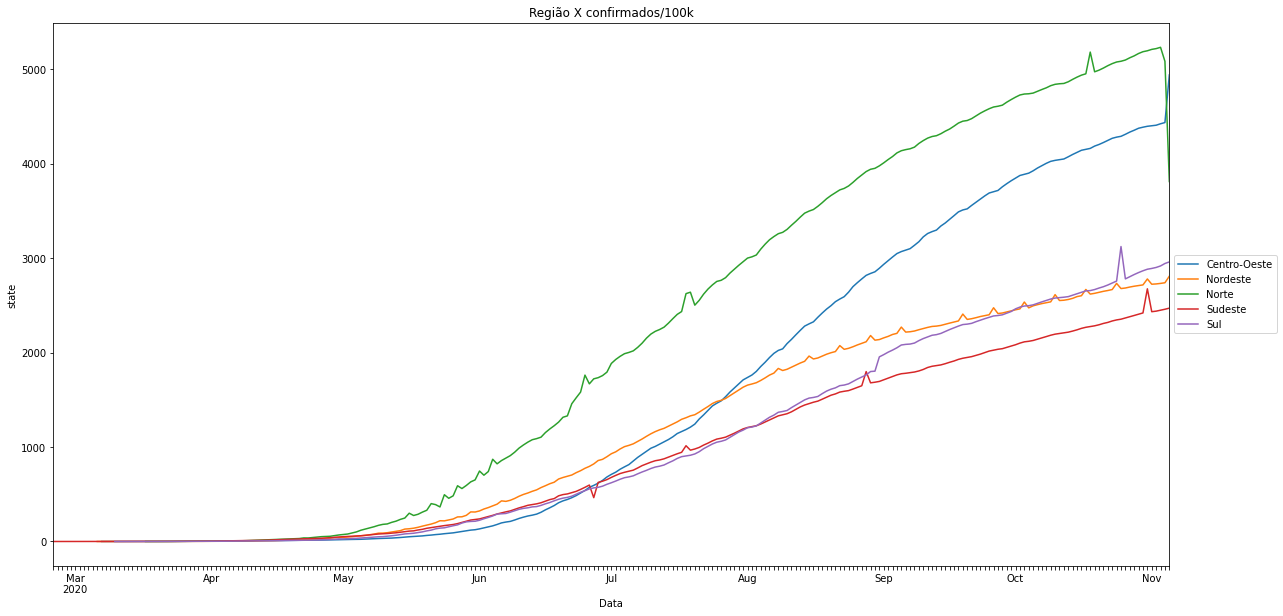

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'confirmed_per_100k_inhabitants',(20, 10),'state',"Região X confirmados/100k")

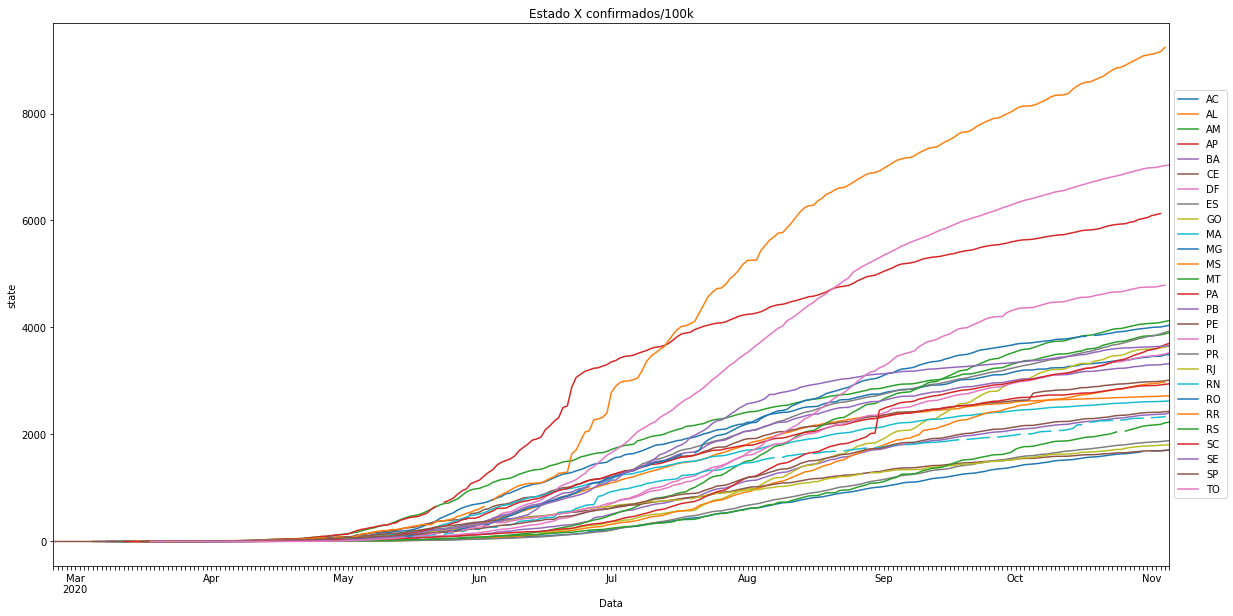

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'state', 'confirmed_per_100k_inhabitants',(20, 10),'state',"Estado X confirmados/100k")

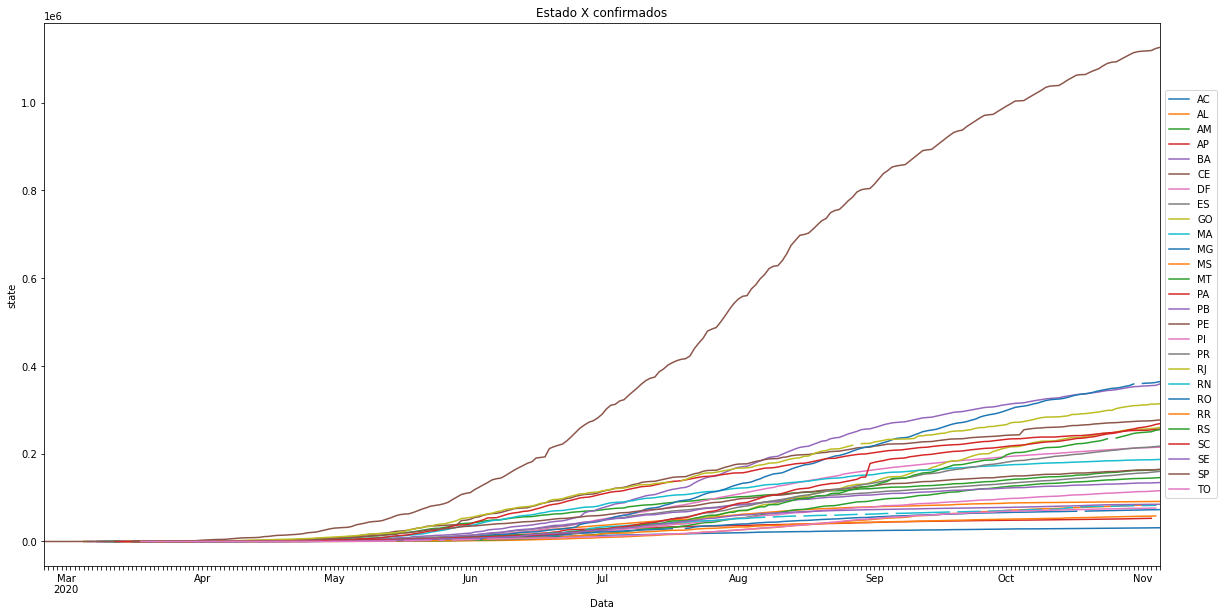

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X confirmados")

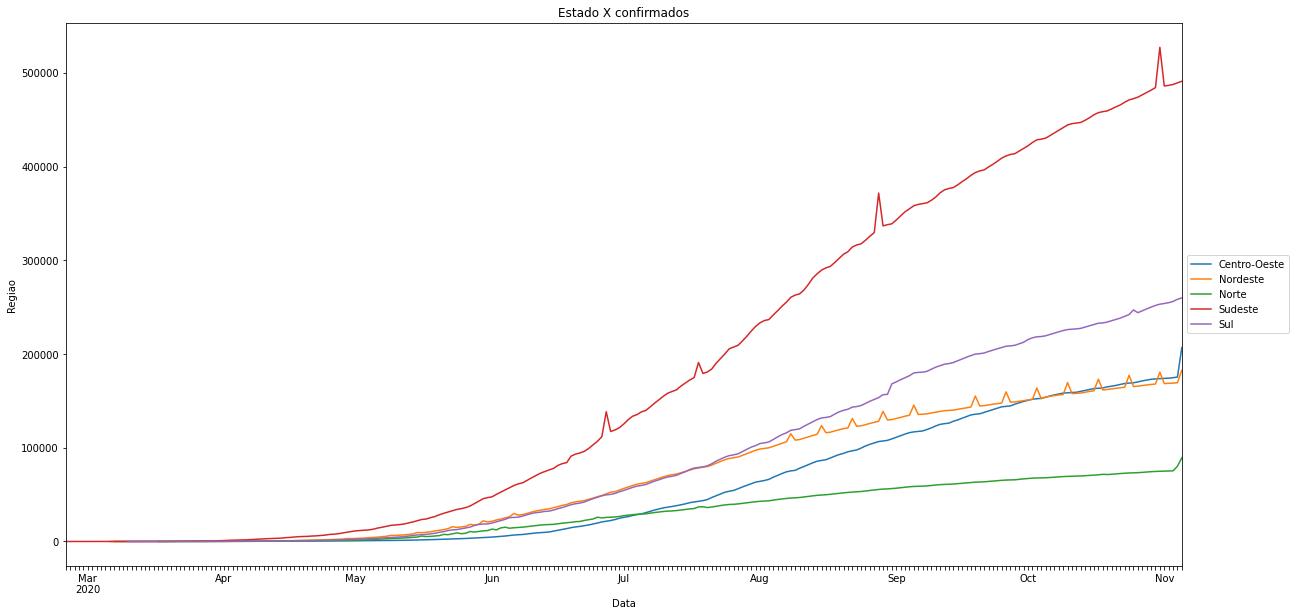

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'confirmed',(20, 10),'Regiao',"Estado X confirmados")

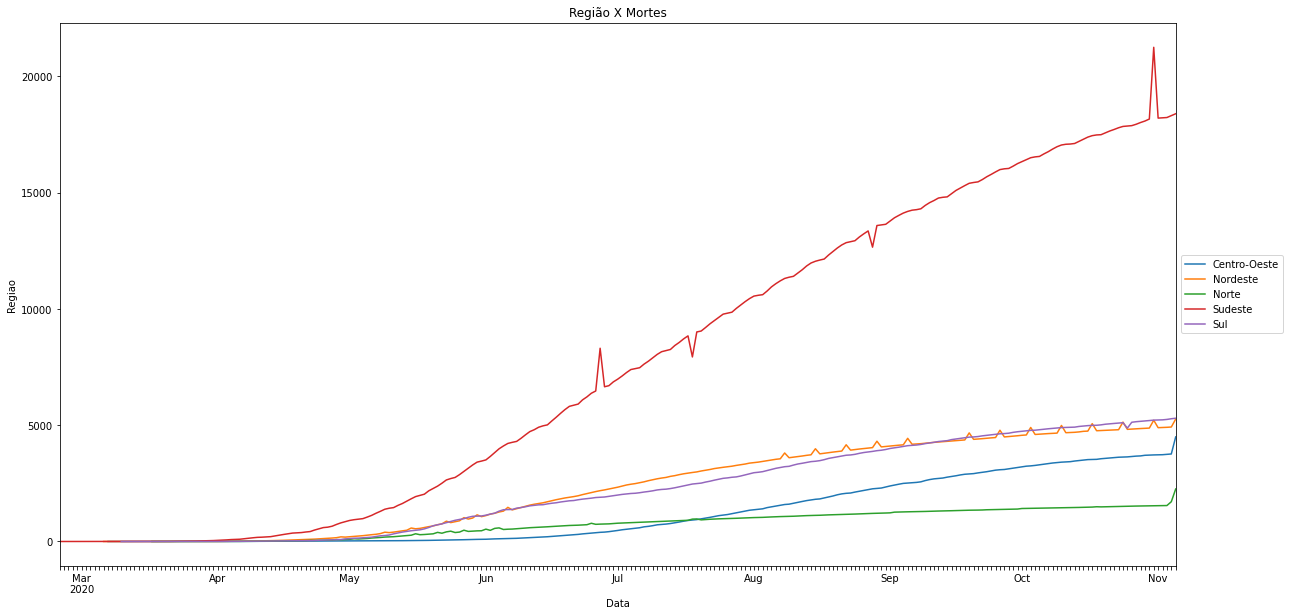

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'deaths',(20, 10),'Regiao',"Região X Mortes")

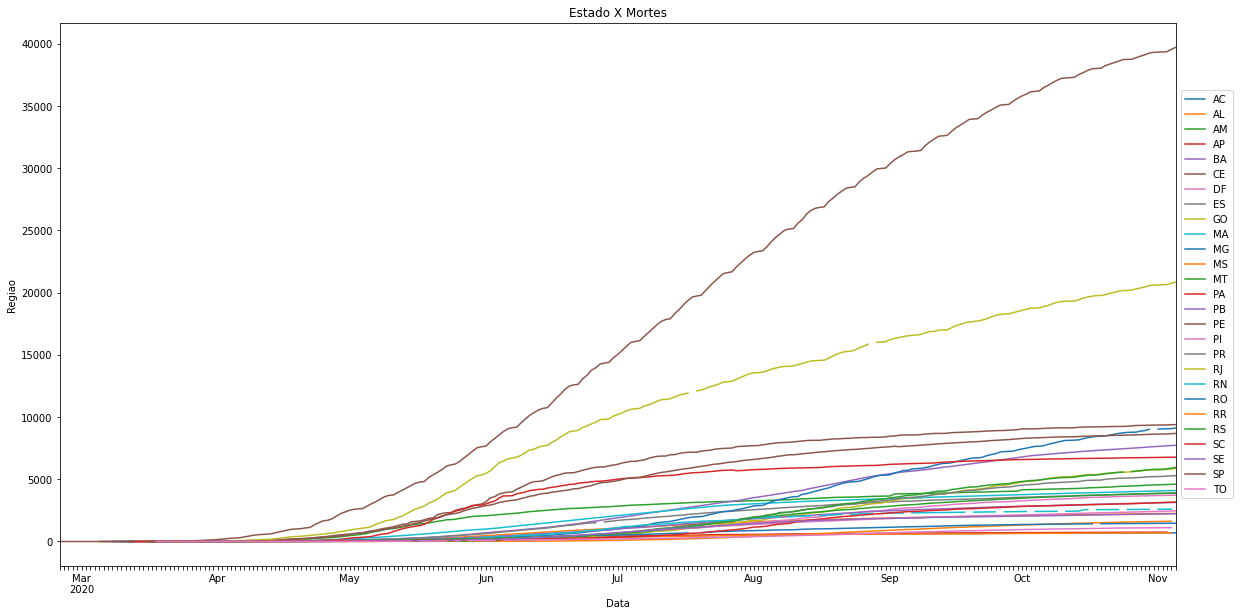

In [ ]:
Plot_Pivot(DF_Estados,'Data', 'state', 'deaths',(20, 10),'Regiao',"Estado X Mortes")

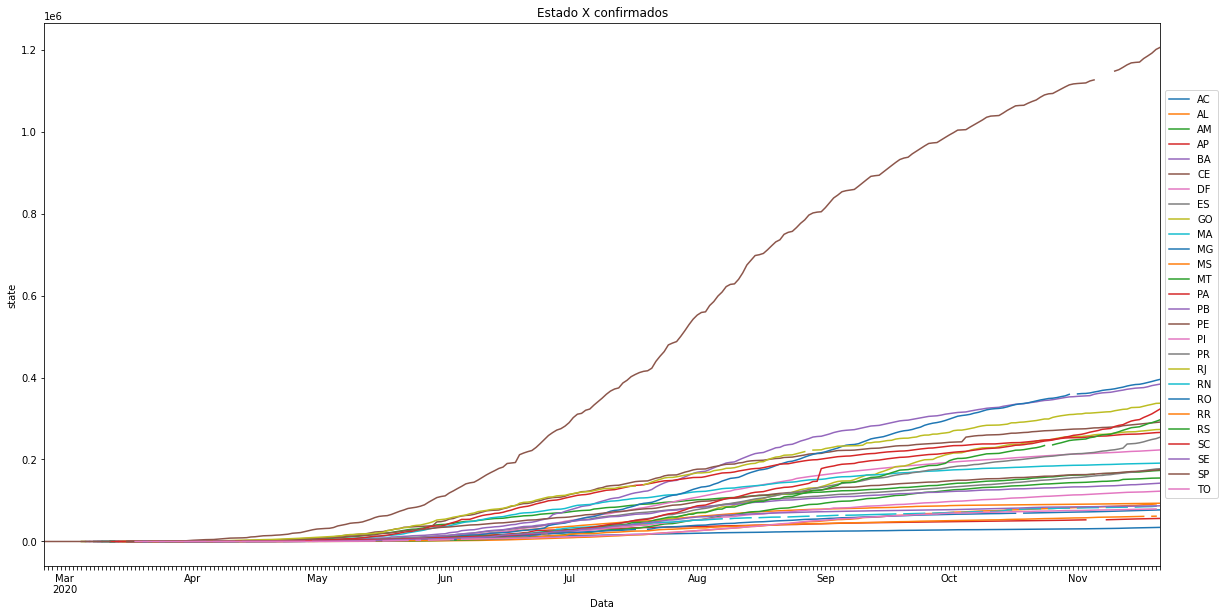

In [ ]:
Plot_Pivot(DF_Estados_new,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X confirmados")

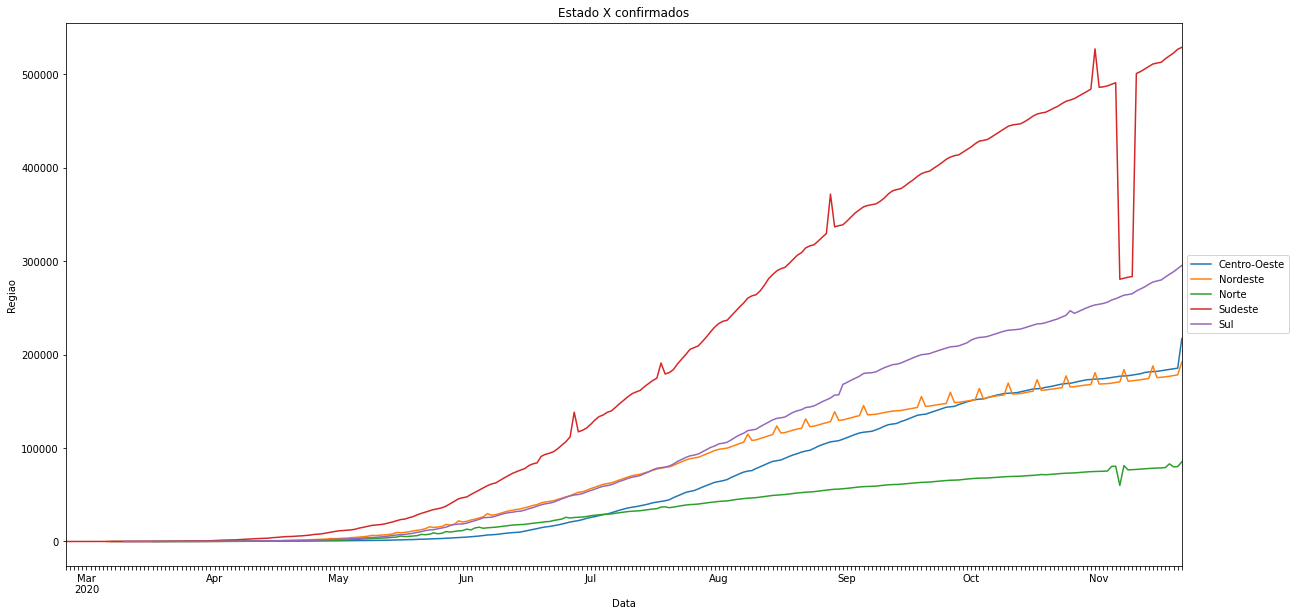

In [ ]:
Plot_Pivot(DF_Estados_new,'Data', 'Regiao', 'confirmed',(20, 10),'Regiao',"Estado X confirmados")

Esta seção serviu para visualização dos gráficos e criação de alguns insights para análises, principalmente pensando nos crescimentos dos índices.

## Gráfico geográfico com mapa de calor para visualização dos dados de COVID regionalizados

In [ ]:
Brasil_MAP = INFOS_UFS.merge(DF_Estados_new, left_on = 'sigla', right_on = 'state', how = 'left' )

In [ ]:
Brasil_MAP = Brasil_MAP.drop(['nome','nomeabrev', 'geometriaaproximada', 'sigla', 'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao', 'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento' ], axis=1)

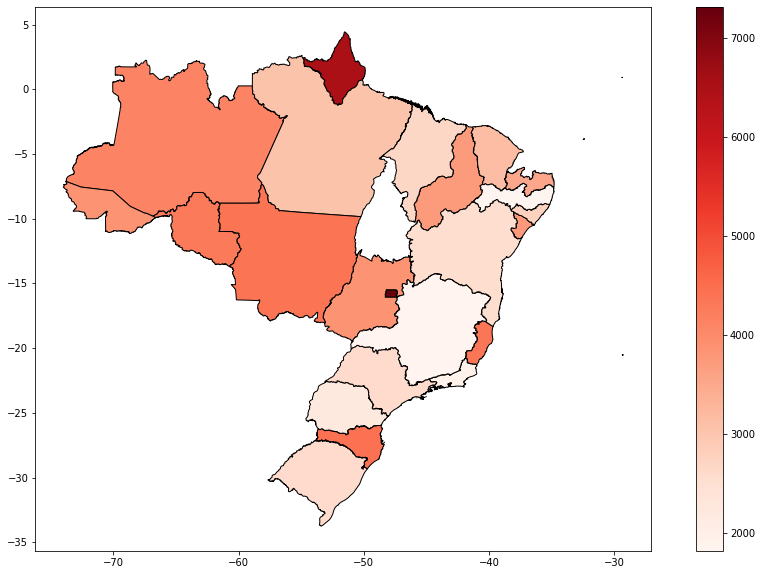

In [ ]:
%matplotlib inline

plot = Brasil_MAP[Brasil_MAP['date']=='2020-11-21'].plot(
    column = 'confirmed_per_100k_inhabitants',
    cmap = 'Reds',
    figsize = (16,10),
    legend = True,
    edgecolor = 'black'
    
)

In [ ]:
datas =  Brasil_MAP['date'].unique()

## Análise dos Gráficos gerados

### Comparação números absolutos X Casos por 100mil habitantes

In [ ]:
Brasil_MAP['confirmed_MM'] = Brasil_MAP['confirmed']/10e5

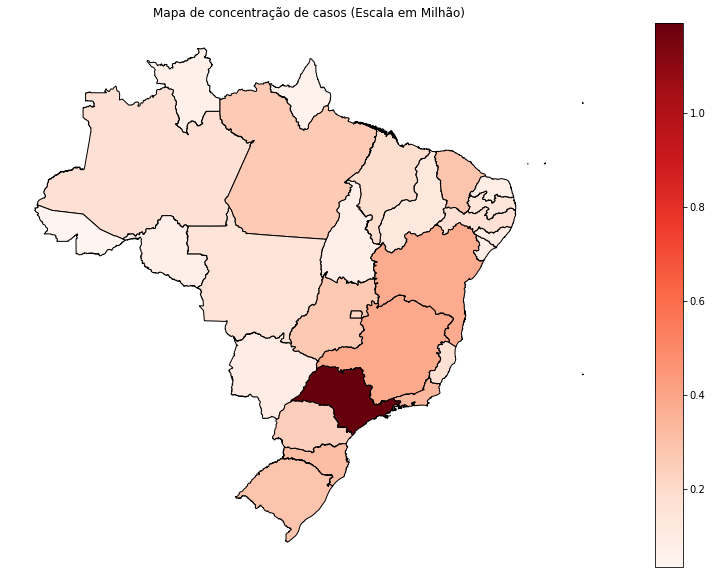

In [ ]:
## Estou usando dados da data 2020-11-19 pois ela, apresenta dados de todos os Estados
plot = Brasil_MAP[Brasil_MAP['date']=='2020-11-19'].plot(  
      column = 'confirmed_MM',
      cmap = 'Reds',
      figsize = (16,10),
      legend = True,
      edgecolor = 'black'
      
  )

plot.axis('off')

plt.title('Mapa de concentração de casos (Escala em Milhão)')
plt.show()


Com este Mapa vemos que, em números absolutos, temos uma quantidade muito grande de casos confirmados no Estado de São Paulo, o que é correto, entretanto, a informação de números absolutos é apenas relevante para a contagem de casos, para além disso, ela é de pouca importância

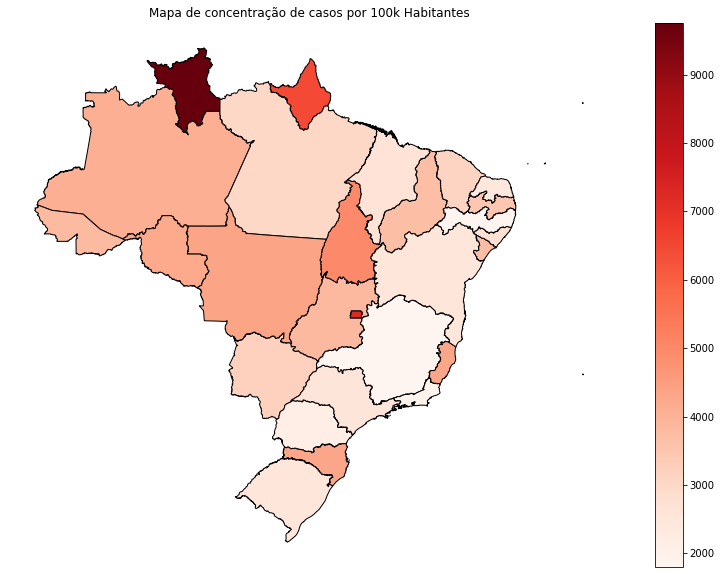

In [ ]:
plot = Brasil_MAP[Brasil_MAP['date']=='2020-11-19'].plot(
      column = 'confirmed_per_100k_inhabitants',
      cmap = 'Reds',
      figsize = (16,10),
      legend = True,
      edgecolor = 'black'
      
  )
plot.axis('off')

plt.title('Mapa de concentração de casos por 100k Habitantes')
plt.show()

Este é um mapa com informação possível de se comparar entre os estados, porque estamos comparando os valores de casos confirmados para cada cem mil habitantes. Neste caso vemos como São Paulo (O estado mais populoso) mesmo tendo muitos casos, não supera os dados de alguns outros estados. E de forma alarmante vemos a situação mais desigual dos estados mais ao Sul em relação aos estados mais ao Norte

### Comparação dos estados pelo número de morte e percentual de mortalidade

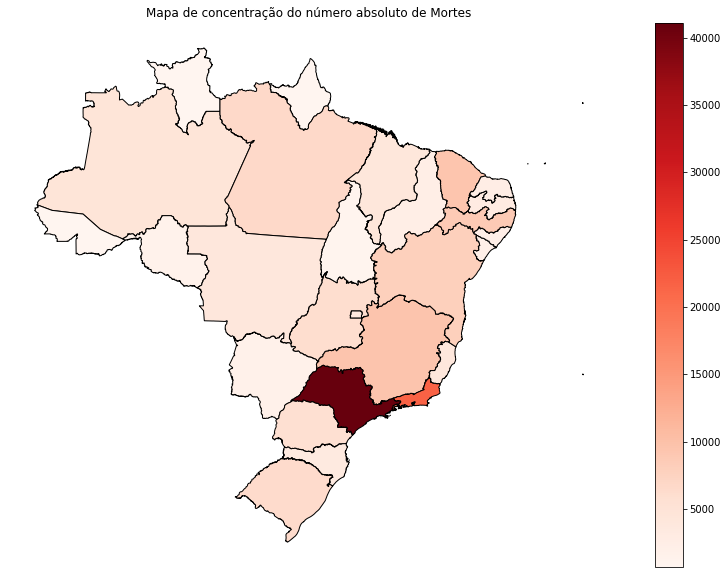

In [ ]:
plot = Brasil_MAP[Brasil_MAP['date']=='2020-11-19'].plot(
      column = 'deaths',
      cmap = 'Reds',
      figsize = (16,10),
      legend = True,
      edgecolor = 'black'
      
  )
plot.axis('off')

plt.title('Mapa de concentração do número absoluto de Mortes')
plt.show()

Aqui também temos uma análise de valores absolutos que, de forma similar aos dados de Casos confirmados, os valores absolutos não são parâmetros para análise.

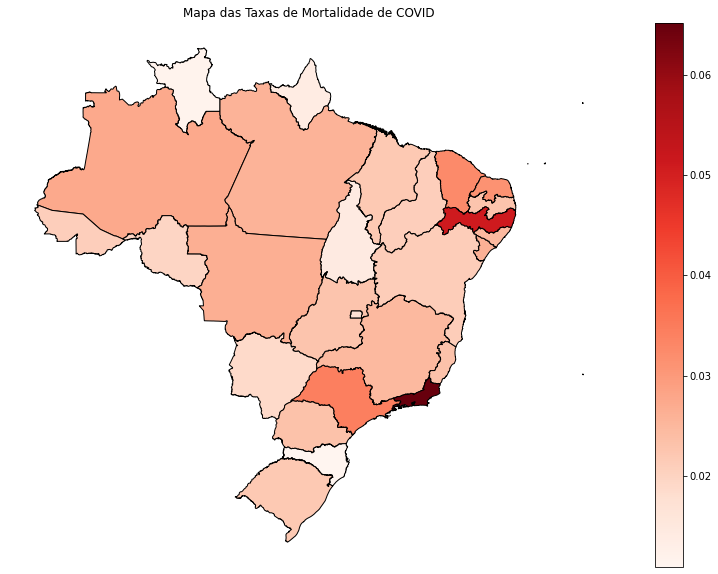

In [ ]:
plot = Brasil_MAP[Brasil_MAP['date']=='2020-11-19'].plot(
      column = 'death_rate',
      cmap = 'Reds',
      figsize = (16,10),
      legend = True,
      edgecolor = 'black'
      
  )
plot.axis('off')

plt.title('Mapa das Taxas de Mortalidade de COVID')
plt.show()

Com este gráfico é possível estipular comparações entre os estados. Desta forma podemos ressaltar a situação do Rio de Janeiro e Pernambuco são os estados com maiores taxas de Mortalidade 

### Análise Brasil

In [ ]:
d = {'confirmed':'sum', 'deaths':'sum', 'estimated_population':'sum'}
DF_BRASIL = DF_Estados_new.groupby('Data', as_index=False).agg(d)
DF_BRASIL['estimated_population'] = 210893919.0 #Devido a falta de valores na base, o valores estimado de populção foi colocado como o valor do dia 2020-11-04
DF_BRASIL['death_rate'] = (((DF_BRASIL['deaths'])*100)/DF_BRASIL['estimated_population'])
DF_BRASIL['state'] = 'BR'
DF_BRASIL['confirmed_MM'] = DF_BRASIL['confirmed']/10e5

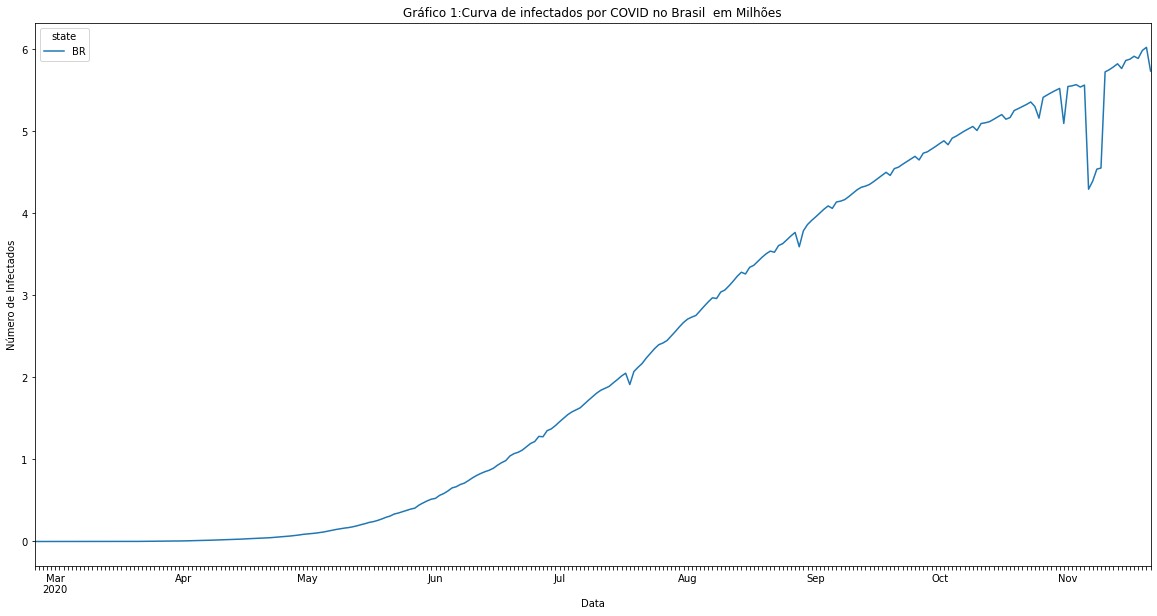

In [ ]:
pivot_df =  DF_BRASIL.pivot_table(index='Data', columns='state', values='confirmed_MM')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Número de Infectados')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 1:Curva de infectados por COVID no Brasil  em Milhões")
plt.show()

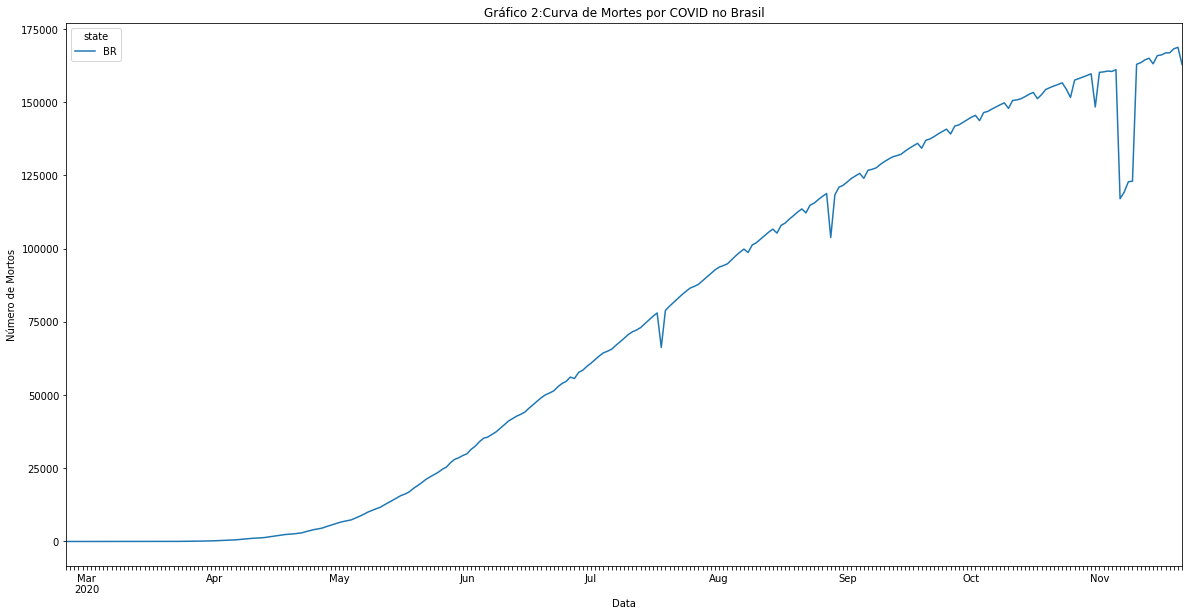

In [ ]:
pivot_df =  DF_BRASIL.pivot_table(index='Data', columns='state', values='deaths')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Número de Mortos')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 2:Curva de Mortes por COVID no Brasil")
plt.show()

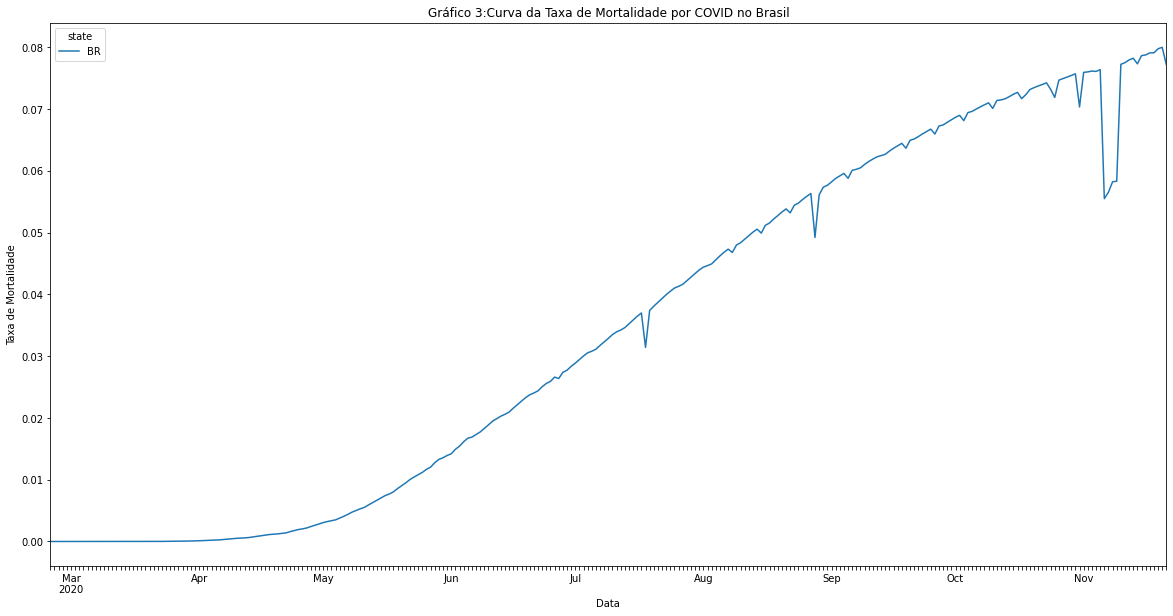

In [ ]:
pivot_df =  DF_BRASIL.pivot_table(index='Data', columns='state', values='death_rate')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Taxa de Mortalidade')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 3:Curva da Taxa de Mortalidade por COVID no Brasil")
plt.show()

Nesta seção vemos as curvas totais de Casos Confirmados (Gráfico 1), Mortes (Gráfico 2) e Taxa de Mortalidade(Gráfico 3). Porém, como já demonstrado, a análise desses valores seria apenas ilustrativo na forma como a curva está se comportando em cada um dos casos. Para melhorar a visualização da tendência, os gráficos serão cortados no em Outubro e Novembro

In [ ]:
DF_BRASIL_Out_Nov =  DF_BRASIL[DF_BRASIL['Data']>= '2020-10-01']
DF_BRASIL_Out_Nov['confirmed_MM'] = DF_BRASIL_Out_Nov['confirmed']/10e5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



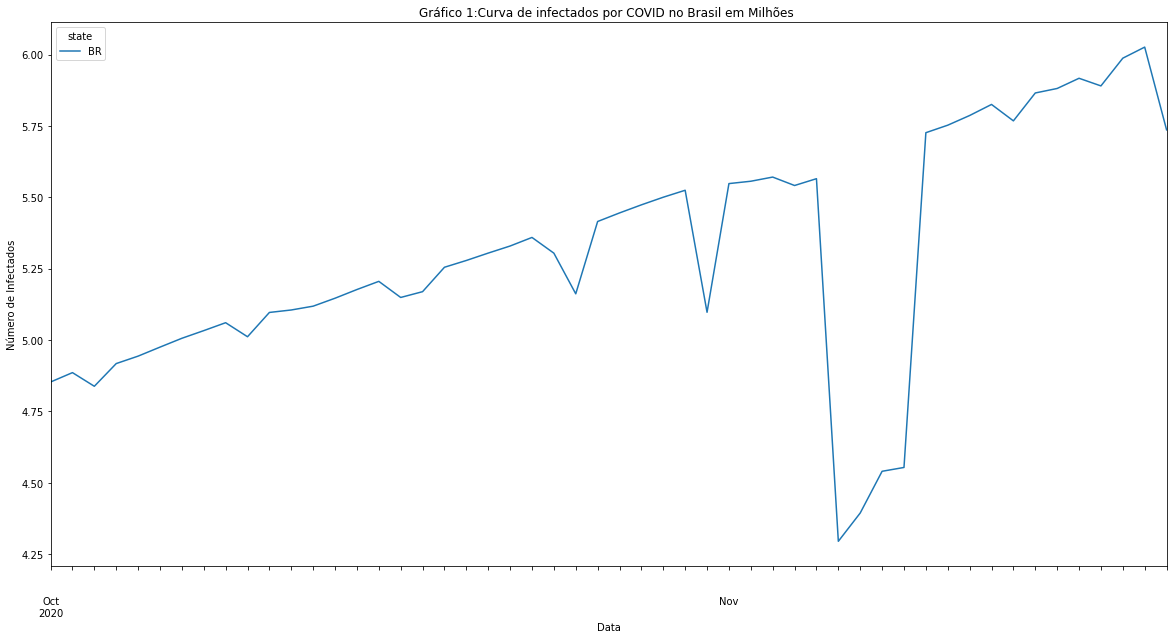

In [ ]:
pivot_df =  DF_BRASIL_Out_Nov.pivot_table(index='Data', columns='state', values='confirmed_MM')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Número de Infectados')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 1:Curva de infectados por COVID no Brasil em Milhões ")
plt.show()

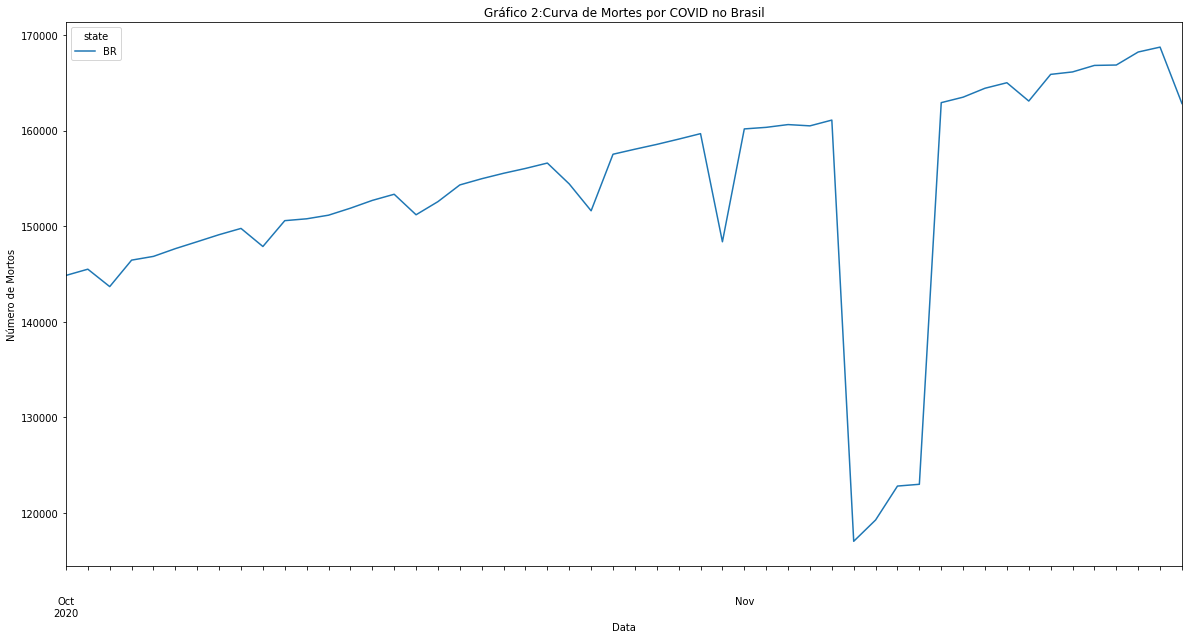

In [ ]:
pivot_df =  DF_BRASIL_Out_Nov.pivot_table(index='Data', columns='state', values='deaths')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Número de Mortos')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 2:Curva de Mortes por COVID no Brasil")
plt.show()

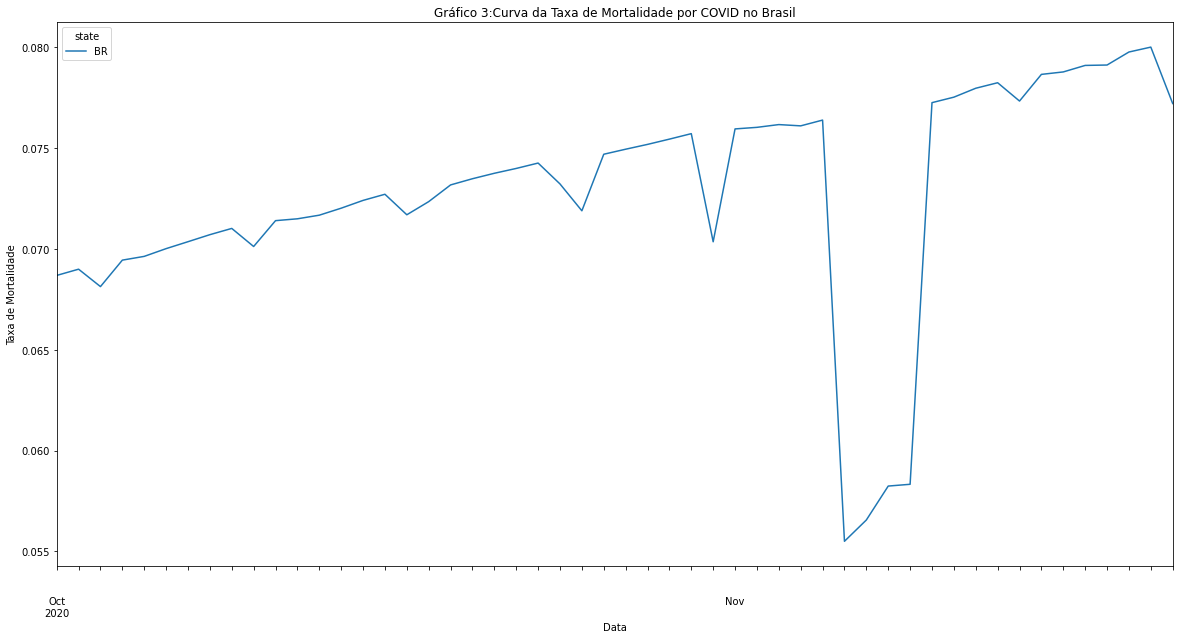

In [ ]:
pivot_df =  DF_BRASIL_Out_Nov.pivot_table(index='Data', columns='state', values='death_rate')
ax = pivot_df.plot(xticks=pivot_df.index,figsize =(20, 10))
ylab = ax.set_ylabel('Taxa de Mortalidade')
xlab = ax.set_xlabel('Data')
plt.title("Gráfico 3:Curva da Taxa de Mortalidade por COVID no Brasil")
plt.show()

É possível ver o intervalo de tmepo onde houve o problema no ambiente TabNet e que ainda não houve normalização das bases de dados (Vide *gap* dos dados). Porém, uma coisa é notória nos 3 gráficos, todos estão com uma tendência crescente em seus valores, isso poderia nos demonstrar que, no intervalo de Outubro/Novembro, está havendo uma crescente destes 3 parâmetros no Brasil. Porém, como é uma análise mais macro, não é possível imbuir nenhuma análise regionalista.

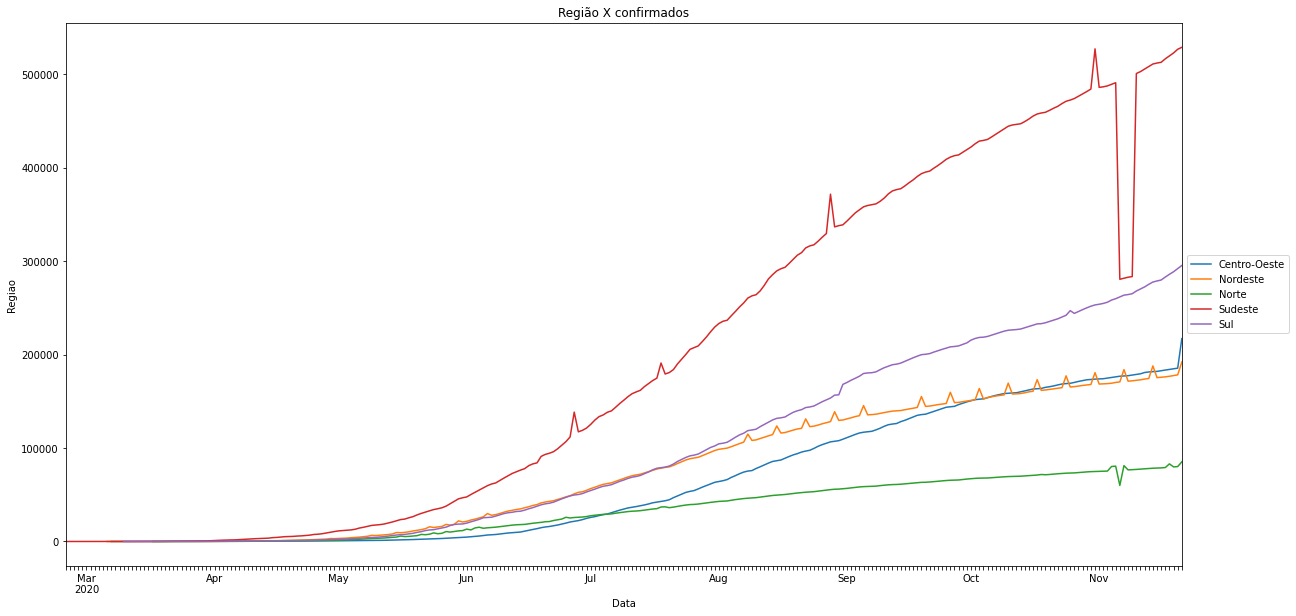

In [ ]:
Plot_Pivot(DF_Estados_new,'Data', 'Regiao', 'confirmed',(20, 10),'Regiao',"Região X confirmados")

Já com este gráfico da curva de casos acumulados por Região, podemos ver que todas as regiões tiveram algum crescimento, a Região Sul, em específico, tem demonstrado um crescimento contínuo há mais tempo. Porém as regiões Sudeste e Centro-Oeste, tem demonstrado que estão tendo uma alta de casos considerável.

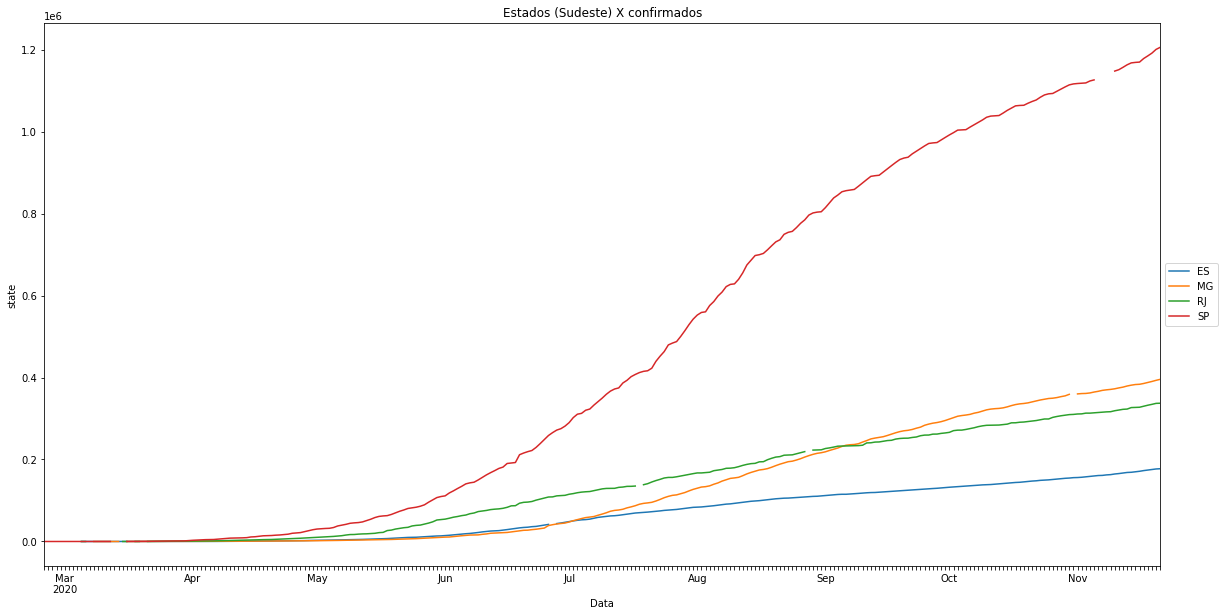

In [ ]:
Plot_Pivot(DF_Estados_new[DF_Estados_new['Regiao']=='Sudeste' ],'Data', 'state', 'confirmed',(20, 10),'state',"Estados (Sudeste) X confirmados")

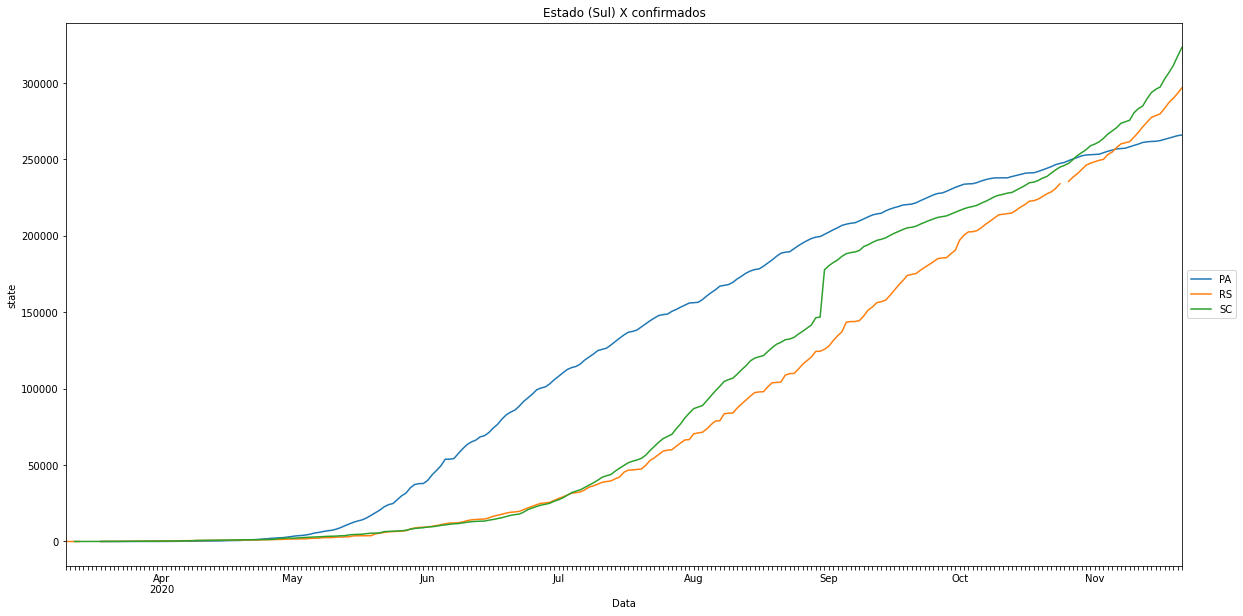

In [ ]:
Plot_Pivot(DF_Estados_new[DF_Estados_new['Regiao']=='Sul' ],'Data', 'state', 'confirmed',(20, 10),'state',"Estado (Sul) X confirmados")

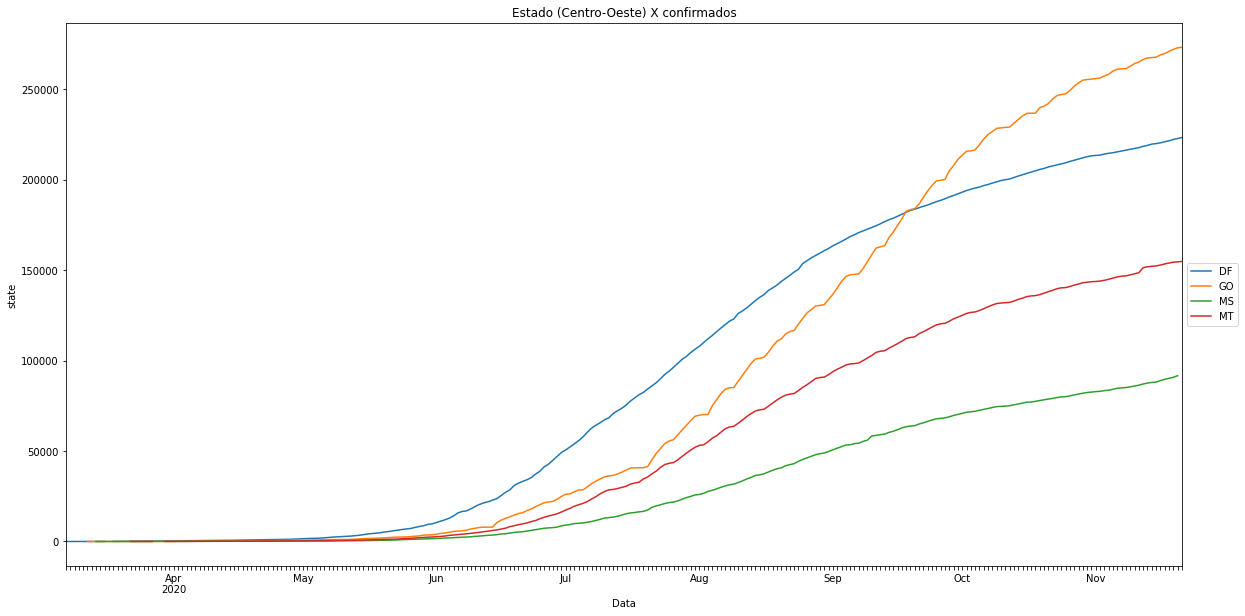

In [ ]:
Plot_Pivot(DF_Estados_new[DF_Estados_new['Regiao']=='Centro-Oeste' ],'Data', 'state', 'confirmed',(20, 10),'state',"Estado (Centro-Oeste) X confirmados")

## Criação das hipóteses

In [ ]:
idh_estado = {'Estado': ['DF','SP','SC','RJ','PR','MG','RS','MT','ES','GO','MS','RO','TO','AP','CE','AM','RN','PE','RO','PB','AC','BA','SE','PA','PI','MA','AL',],
              'IDH': [0.850,0.826, 0.808 ,0.796,0.792,0.787,0.787 ,0.774 ,0.772 ,0.769 ,0.766 ,0.752 ,0.743 ,0.740 ,0.735  ,0.733 ,0.731 ,0.727   ,0.725  ,0.722  ,0.719  ,0.714   ,0.702
                      ,0.698 ,0.697 ,0.687 ,0.683]}
IDH_Estados = pd.DataFrame.from_dict(idh_estado)

In [ ]:
Brasil_idh = INFOS_UFS.merge(IDH_Estados, left_on = 'sigla', right_on = 'Estado', how = 'left' )

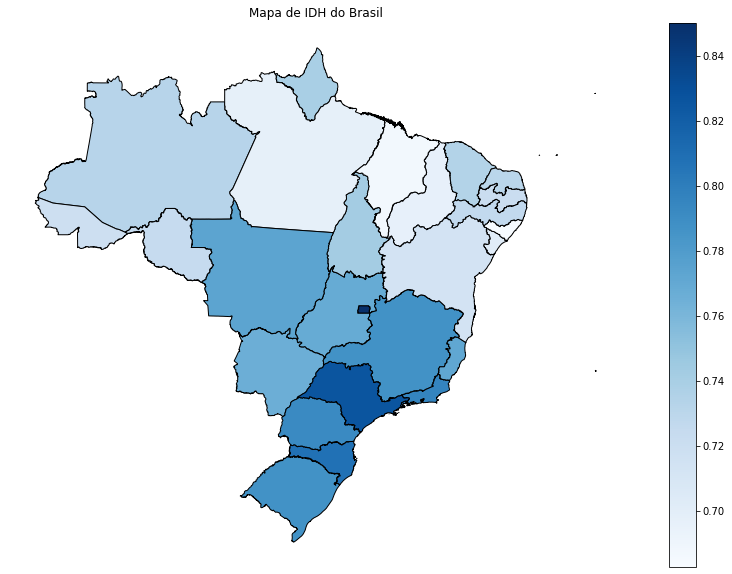

In [ ]:
plot = Brasil_idh.plot(
      column = 'IDH',
      cmap = 'Blues',
      figsize = (16,10),
      legend = True,
      edgecolor = 'black'
      
  )
plot.axis('off')

plt.title('Mapa de IDH do Brasil')
plt.show()

## Conclusões sobre a COVID X IDH nos estados brasileiros

Através de um comparativo do IDH com os Mapas de Casos Confirmados por 100 mil habitantes, podemos ver que existe uma grande correlação entre este percentual de casos confirmados versus os o valor do IDH (que indica sobre tudo a qualidade de vida dos habitantes com métricas de saúde inclusas). Porém, vemos que existe uma grande taxa de Mortalidade no Rio de Janeiro, apesar de seu alto IDH, o que demonstra que a análise possui diversas variáveis ainda não apresentadas neste trabalho.

## Conclusão sobre o desenvolvimento do trabalho

Este é um trabalho introdutório da temática COVID usando as métricas desenvolvidas no Bootcamp da Alura e servirá de guia para futuras análises, nele foram incluídos diversas informações e gráficos para melhor elucidação de possíveis fatores para o desenvolvimento da COVID no Brasil. 